<h3 align="right">hPu, &nbsp; dSPN, &nbsp; 150602_c1_D1, &nbsp; AB5_porta76_cel3 </h3>

# Model selection

## Model data

In [1]:
import cell_model, cell_evaluator
morphofile = 'morphology/AB5_porta76_cel3.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_356.soma.v': 'expdata/ECall_IV_ch3_356.dat',
    'IV_364.soma.v': 'expdata/ECall_IV_ch3_364.dat',    
    'IDthresh-sub_398.soma.v': 'expdata/ECall_IDthresh_ch3_398.dat',    
    'IDthresh_400.soma.v': 'expdata/ECall_IDthresh_ch3_400.dat',    
    'IDthresh_402.soma.v': 'expdata/ECall_IDthresh_ch3_402.dat',    
    'IDthresh_410.soma.v': 'expdata/ECall_IDthresh_ch3_410.dat',    
}

## Simulation environment

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [4]:
from utils import *

In [5]:
%%capture
!rm -rf x86_64
!nrnivmodl mechanisms

## Cell model definition

In [6]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [7]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print (cell)

dspn:
  morphology:
    morphology/AB5_porta76_cel3.swc
  mechanisms:
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kdr.somatic: kdr at ['somatic']
    kir.somatic: kir at ['somatic']
    cal12.somatic: cal12 at ['somatic']
    cal13.somatic: cal13 at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    caldyn.somatic: caldyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
    Im.somatic: Im at ['somatic']
    naf.axonal: naf at ['axonal']
    kas.axonal: kas at ['axonal']
    Im.axonal: Im at ['axonal']
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kdr.basal: kdr at ['basal']
    kir.basal: kir at ['basal']
    cal12.basal: cal12 at ['basal']
    cal13.basal: cal13 at ['basal']
    car.basal: car at ['basal']
    cat32.basal: cat32

In [8]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
opt_bounds = [p.bounds for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print (x)

g_pas.axonal
g_pas.basal
g_pas.somatic
gbar_Im.axonal
gbar_Im.somatic
gbar_bk.basal
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.axonal
gbar_kas.basal
gbar_kas.somatic
gbar_kdr.basal
gbar_kdr.somatic
gbar_naf.axonal
gbar_naf.basal
gbar_naf.somatic
gbar_sk.basal
gbar_sk.somatic


## Cell evaluator

In [9]:
simulator = ephys.simulators.NrnSimulator()

In [10]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [11]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


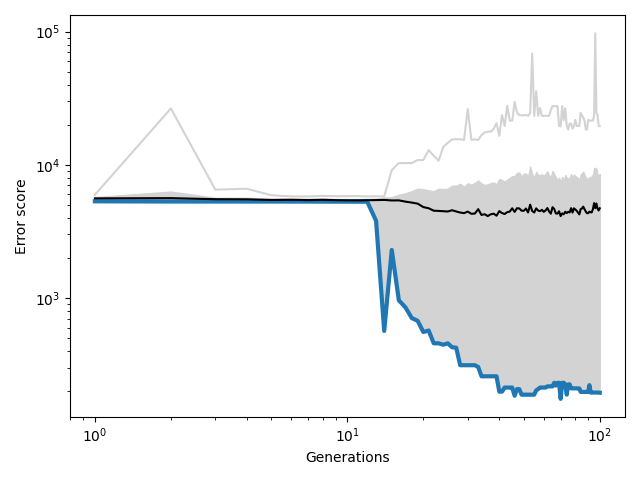

In [12]:
plot_log(log)

In [13]:
best_models = json.load(open('best_models.json'))
pandas.options.display.float_format = '{:,.4g}'.format
bm = pandas.DataFrame(best_models)
bm.T

,0,1,2,3,4,5,6,7,8,9
g_pas.axonal,0.0005655,0.004302,0.003493,0.006895,0.001083,0.003951,0.00368,0.004468,0.002465,0.004602
g_pas.somatic,6.652e-05,6.901e-05,4.749e-05,0.0001306,9.812e-05,0.0001961,2.36e-05,0.0002728,0.0001807,0.0003075
g_pas.basal,0.0001179,7.621e-05,7.853e-05,5.485e-05,0.0001096,7.193e-05,8.775e-05,5.766e-05,8.185e-05,6.123e-05
gbar_naf.axonal,6.42,7.859,7.836,15.89,12.4,14.69,8.769,9.948,3.872,17.68
gbar_kas.axonal,0.00352,0.02058,0.004603,0.006207,0.0005357,0.002339,0.004363,0.0155,0.003445,0.009433
gbar_Im.axonal,0.04102,0.01361,0.02229,0.03427,0.03987,0.006959,0.04271,0.03851,0.04339,0.0194
gbar_naf.somatic,9.524,9.559,9.199,9.757,7.707,9.394,9.199,9.525,9.546,9.443
gbar_kaf.somatic,0.000204,0.03004,0.01839,0.0008174,8.111e-08,0.007968,0.0001453,0.00216,0.009973,0.0005655
gbar_kas.somatic,0.002391,0.0008223,0.002392,2.684e-05,4.621e-05,0.001465,0.002746,1.12e-05,2.195e-05,0.0002318
gbar_kdr.somatic,0.0001616,0.0009937,0.001159,0.001269,0.001388,0.0006948,0.0003693,0.0007901,0.0005501,0.001636


<IPython.core.display.Javascript object>


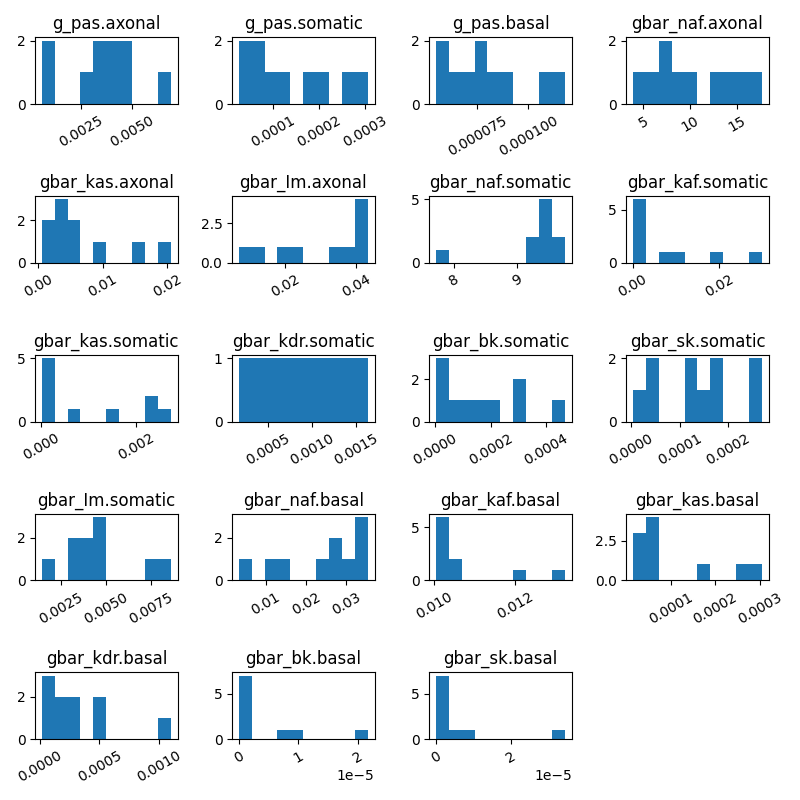

In [14]:
axs = bm.hist(grid=False, xrot=30, figsize=(8,8))
plt.tight_layout();

<IPython.core.display.Javascript object>


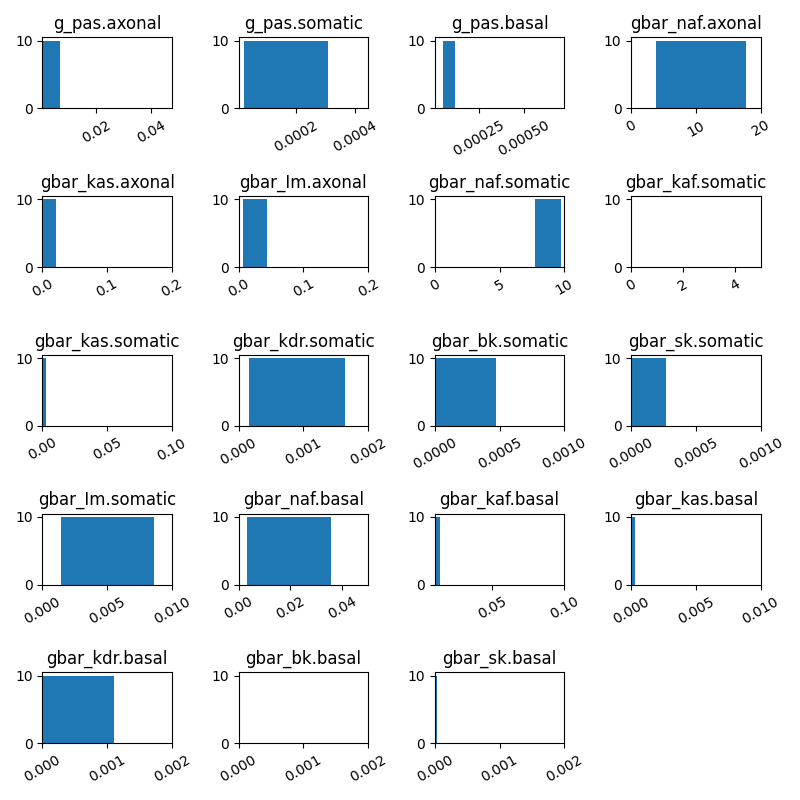

In [15]:
axs = bm.hist(bins=1, grid=False, xrot=30, figsize=(8,8))
for ax, bounds in zip(axs.flatten(), opt_bounds):
        ax.set_xlim(bounds)
plt.tight_layout();

In [16]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

<IPython.core.display.Javascript object>


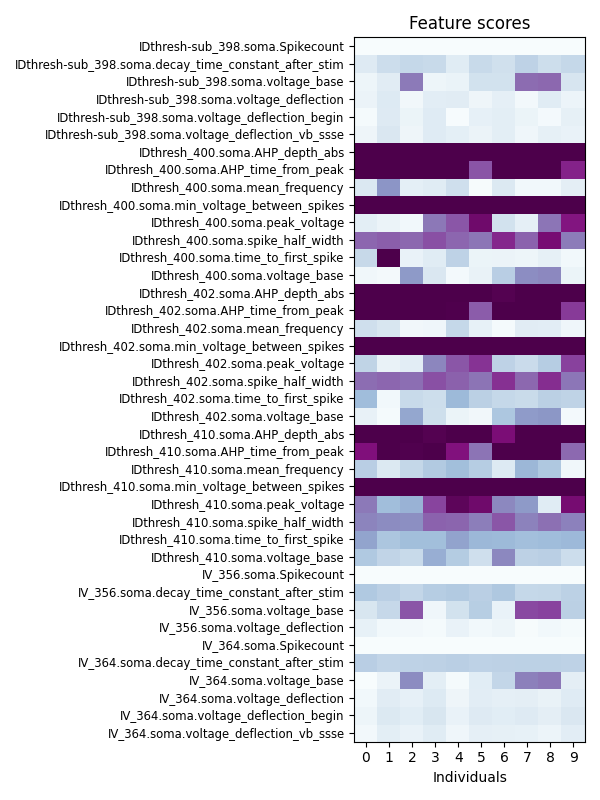

In [17]:
if evaluate_all:
    plot_scores(df, figsize=(6, 8), vmin=0, vmax=10)

## Single-cell simulation

In [18]:
ind = 0
test_parameters = best_models[ind].copy()
test_parameters

{'g_pas.axonal': 0.0005654847242417356,
 'g_pas.somatic': 6.65189146074006e-05,
 'g_pas.basal': 0.0001179231831212076,
 'gbar_naf.axonal': 6.4204868368932635,
 'gbar_kas.axonal': 0.0035197793018291066,
 'gbar_Im.axonal': 0.04101510989712566,
 'gbar_naf.somatic': 9.523685376394686,
 'gbar_kaf.somatic': 0.00020400270350408485,
 'gbar_kas.somatic': 0.002391176445979001,
 'gbar_kdr.somatic': 0.00016158400524291574,
 'gbar_bk.somatic': 0.00016859720839937148,
 'gbar_sk.somatic': 0.00026946222423279167,
 'gbar_Im.somatic': 0.0045319766270693704,
 'gbar_naf.basal': 0.03518722083531388,
 'gbar_kaf.basal': 0.010170890102840457,
 'gbar_kas.basal': 2.4715632836498356e-05,
 'gbar_kdr.basal': 1.866073273928403e-05,
 'gbar_bk.basal': 2.7698872478232315e-08,
 'gbar_sk.basal': 7.79523521770733e-06}

In [19]:
#test_parameters['gbar_kaf.somatic'] = 0.4
#test_parameters['gbar_naf.axonal'] = 10
#test_parameters['gbar_naf.somatic'] = 10

In [20]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

<IPython.core.display.Javascript object>


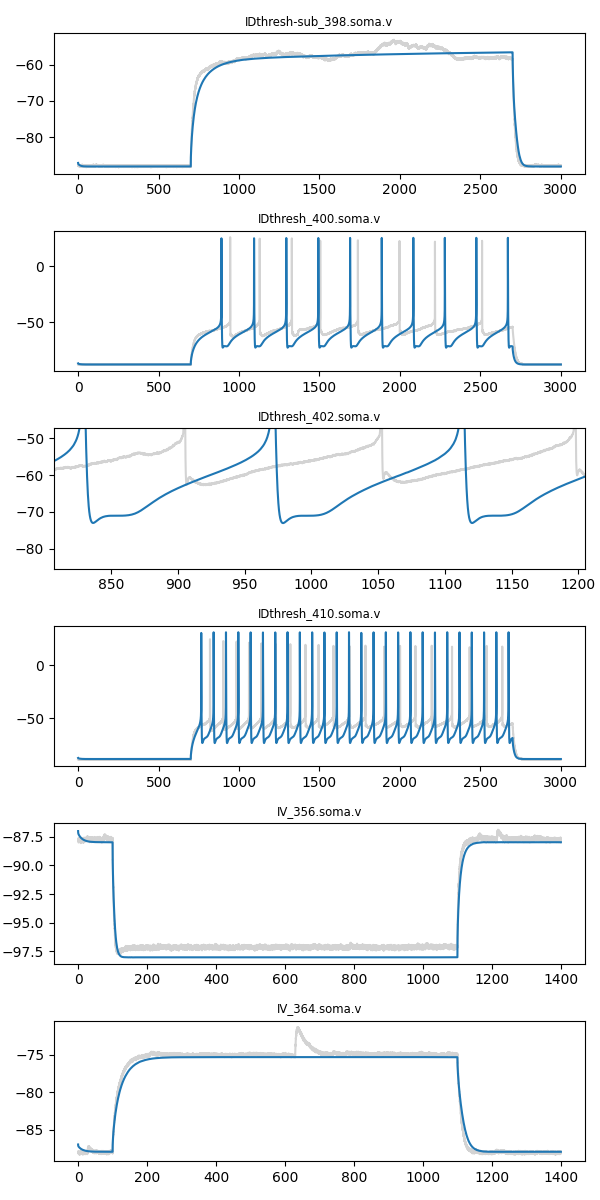

In [21]:
plot_responses(test_responses, expdata=expdata, junction_potential=11.5, figsize=(6,12))

<IPython.core.display.Javascript object>


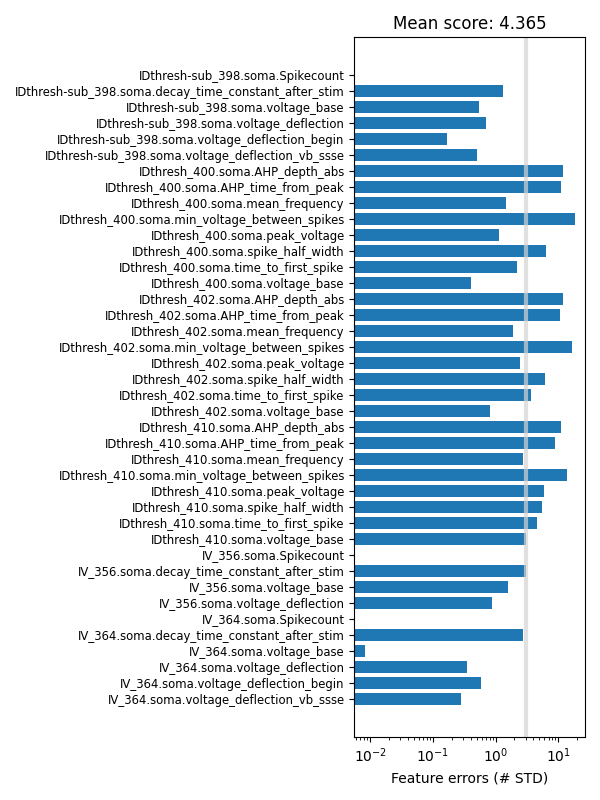

In [22]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,8))

In [23]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
def highlight_low(x):
    def c(v):
        r = int(v/x.max()*255)
        g = int(v/x.max()*128)+127
        b = 255
        return '#%02x%02x%02x' % (r, g, b)
    return ['background-color: %s' % c(v) for v in x]
df.style.apply(highlight_low)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,2.440000,2.170000,2.540000,2.530000,2.120000,1.850000,2.750000,2.450000,2.760000
1,2.440000,0.000000,1.530000,2.230000,2.180000,2.110000,2.250000,2.380000,1.950000,2.240000
2,2.170000,1.530000,0.000000,1.920000,2.370000,2.010000,2.190000,2.530000,1.740000,2.610000
3,2.540000,2.230000,1.920000,0.000000,2.240000,2.440000,2.300000,1.810000,1.860000,2.360000
4,2.530000,2.180000,2.370000,2.240000,0.000000,2.640000,2.550000,2.500000,2.100000,2.530000
5,2.120000,2.110000,2.010000,2.440000,2.640000,0.000000,2.590000,2.550000,2.300000,2.630000
6,1.850000,2.250000,2.190000,2.300000,2.550000,2.590000,0.000000,2.500000,2.350000,2.690000
7,2.750000,2.380000,2.530000,1.810000,2.500000,2.550000,2.500000,0.000000,2.170000,2.410000
8,2.450000,1.950000,1.740000,1.860000,2.100000,2.300000,2.350000,2.170000,0.000000,2.530000
9,2.760000,2.240000,2.610000,2.360000,2.530000,2.630000,2.690000,2.410000,2.530000,0.000000


In [24]:
hall_of_fame = []
selected = range(10)
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)